In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv('./SBI.csv')
df.head()

,Unnamed: 0,id,fever_hours,age,sex,wcc,prevAB,sbi,pct,crp
0,1,57906,24.0,0.79,M,3.8,No,UTI,0.090000,17.700000
1,2,58031,48.0,1.91,F,25.3,Yes,UTI,4.400000,150.400000
2,3,58148,24.0,0.07,F,20.0,No,UTI,0.548136,47.359279
3,4,58169,72.0,0.95,M,6.0,No,UTI,0.310000,4.900000
4,5,58517,1.0,0.11,F,15.6,No,UTI,0.936872,31.394860


In [25]:
df.drop(['Unnamed: 0', 'id', 'sex', 'fever_hours'],  axis=1, inplace=True)

In [26]:
df.head()

,age,wcc,prevAB,sbi,pct,crp
0,0.79,3.8,No,UTI,0.090000,17.700000
1,1.91,25.3,Yes,UTI,4.400000,150.400000
2,0.07,20.0,No,UTI,0.548136,47.359279
3,0.95,6.0,No,UTI,0.310000,4.900000
4,0.11,15.6,No,UTI,0.936872,31.394860


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     2348 non-null   float64
 1   wcc     2348 non-null   float64
 2   prevAB  2348 non-null   object 
 3   sbi     2348 non-null   object 
 4   pct     2348 non-null   float64
 5   crp     2348 non-null   float64
dtypes: float64(4), object(2)
memory usage: 110.2+ KB


In [6]:
df.isna().sum()

age       0
wcc       0
prevAB    0
sbi       0
pct       0
crp       0
dtype: int64

In [11]:
df.shape

(2348, 6)

<AxesSubplot: ylabel='pct'>

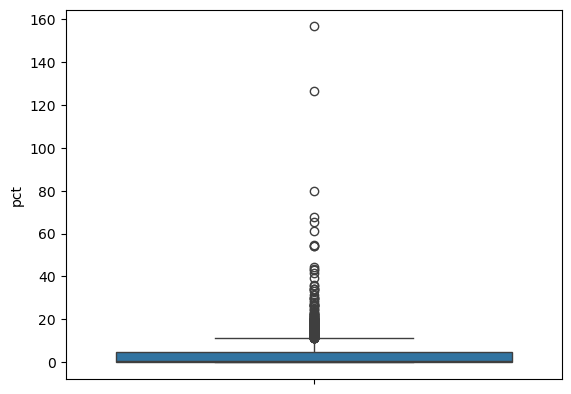

In [15]:
sns.boxplot(df['pct'])

<!-- Lets Convert the Objects into Numerical Features -->

## Let's Convert the objects features into numerical

In [27]:
df['prevAB'] = df['prevAB'].map({"No": 0, "Yes": 1})

In [29]:
df['prevAB'].unique()

array([0, 1])

In [31]:
df['sbi'].unique()

array(['UTI', 'Pneu', 'Bact', 'NotApplicable'], dtype=object)

## Encode the sbi feature for OvR

In [33]:
# create object of LabelEncoder
coder = LabelEncoder()

In [34]:
y = coder.fit_transform(df['sbi'])
y

array([3, 3, 3, ..., 1, 1, 1])

In [35]:
df['sbi'].tolist()

['UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',
 'UTI',


In [36]:
# Step 2: Check the mapping of labels to numeric values
label_mapping = dict(zip(coder.classes_, range(len(coder.classes_))))
print(label_mapping)

{'Bact': 0, 'NotApplicable': 1, 'Pneu': 2, 'UTI': 3}


In [37]:
X = df.drop('sbi', axis=1)

In [38]:
X.head()

,age,wcc,prevAB,pct,crp
0,0.79,3.8,0,0.090000,17.700000
1,1.91,25.3,1,4.400000,150.400000
2,0.07,20.0,0,0.548136,47.359279
3,0.95,6.0,0,0.310000,4.900000
4,0.11,15.6,0,0.936872,31.394860


In [39]:
y

array([3, 3, 3, ..., 1, 1, 1])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')

In [44]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      0.97      0.84       343
           2       0.00      0.00      0.00        58
           3       0.20      0.05      0.07        66

    accuracy                           0.71       470
   macro avg       0.23      0.25      0.23       470
weighted avg       0.56      0.71      0.62       470



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
print("Accuracy Score")
accuracy_score(y_test, y_pred)

Accuracy Score


0.7148936170212766

In [49]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[  0,   2,   0,   1],
       [  0, 333,   1,   9],
       [  0,  56,   0,   2],
       [  0,  63,   0,   3]])

In [50]:
prediction = [1, 29, 0, 5, 200]

In [51]:
print(lr.predict([prediction]))

[3]


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
lr.predict([[0.79, 	3.8 	,0 	,0.090000 	,17.700000]])

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [56]:
df['sbi'] = y

In [57]:
df

,age,wcc,prevAB,sbi,pct,crp
0,0.79,3.8,0,3,0.090000,17.700000
1,1.91,25.3,1,3,4.400000,150.400000
2,0.07,20.0,0,3,0.548136,47.359279
3,0.95,6.0,0,3,0.310000,4.900000
4,0.11,15.6,0,3,0.936872,31.394860
...,...,...,...,...,...,...
2343,1.06,14.1,0,1,0.160000,16.700000
2344,3.05,14.6,0,1,1.080000,77.500000
2345,1.81,6.0,0,1,0.480000,75.300000
2346,1.24,16.3,1,1,20.280000,17.300000


In [58]:
df.to_csv("preprocess_sbi.csv", index=False)